# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler,X_scaled

(StandardScaler(),
 array([[-1.42456879, -1.73899919, -0.43480148],
        [-1.28103541, -1.73899919,  1.19570407],
        [-1.3528021 , -1.70082976, -1.71591298],
        [-1.13750203, -1.70082976,  1.04041783],
        [-0.56336851, -1.66266033, -0.39597992],
        [-1.20926872, -1.66266033,  1.00159627],
        [-0.27630176, -1.62449091, -1.71591298],
        [-1.13750203, -1.62449091,  1.70038436],
        [ 1.80493225, -1.58632148, -1.83237767],
        [-0.6351352 , -1.58632148,  0.84631002],
        [ 2.02023231, -1.58632148, -1.4053405 ],
        [-0.27630176, -1.58632148,  1.89449216],
        [ 1.37433211, -1.54815205, -1.36651894],
        [-1.06573534, -1.54815205,  1.04041783],
        [-0.13276838, -1.54815205, -1.44416206],
        [-1.20926872, -1.54815205,  1.11806095],
        [-0.27630176, -1.50998262, -0.59008772],
        [-1.3528021 , -1.50998262,  0.61338066],
        [ 0.94373197, -1.43364376, -0.82301709],
        [-0.27630176, -1.43364376,  1.8556706 ],
 

C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

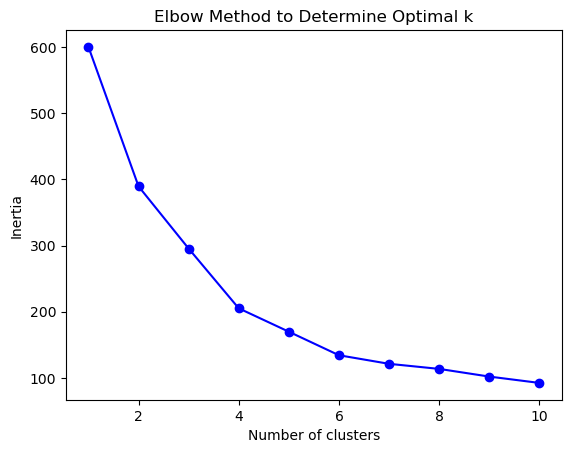

In [12]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
kmeans,clusters

C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(KMeans(n_clusters=5, random_state=42),
 array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
        0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
        0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
        3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
        0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
        3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
        4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
        4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
        4, 1], dtype=int32))

In [18]:
df['Cluster'] = clusters
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


         Age  Annual Income (k$)  Spending Score (1-100)
0  55.275862           47.620690               41.706897
1  32.875000           86.100000               81.525000
2  25.769231           26.115385               74.846154
3  26.733333           54.311111               40.911111
4  44.387097           89.774194               18.483871


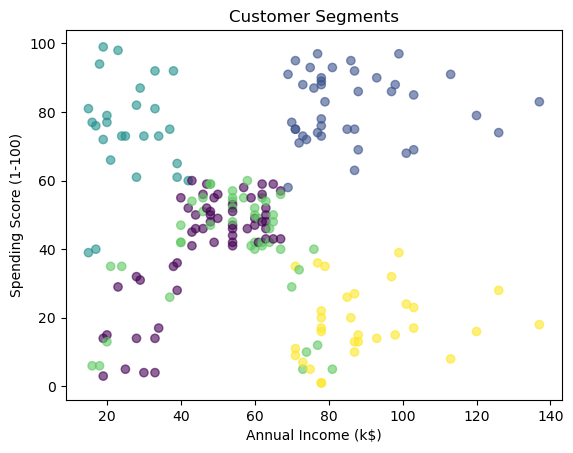

In [19]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(cluster_centers, columns=X.columns))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()
